In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv('medical_examination.csv')

In [54]:
df.head(1)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0


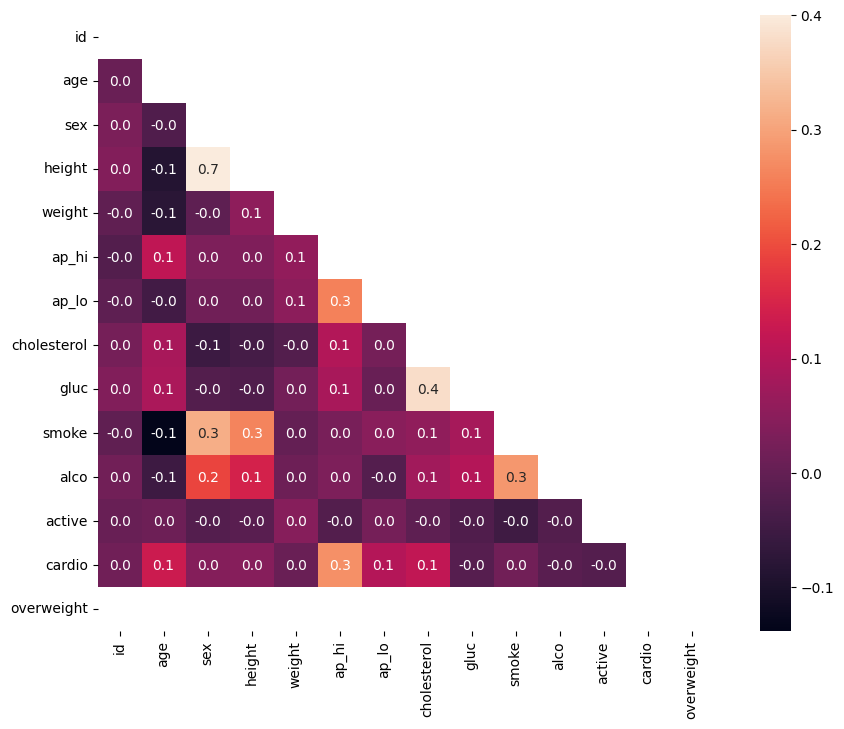

In [55]:
df = pd.read_csv('medical_examination.csv')
# 2
df['overweight'] = (df['weight']/((df['height']/100)**2)>25).astype(int)
# 3
df['cholesterol']=(df['cholesterol']>1).astype(int)
df['gluc']=(df['gluc']>1).astype(int)
 
# 11
df_heat = df.loc[(df['ap_lo']<=df['ap_lo']) & (df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975)) &
                 (df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] >= df['weight'].quantile(0.975))]
df_heat

corr=df_heat.corr()
corr

mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
mask

fig,ax=plt.subplots(figsize=(12,8))
ax=sns.heatmap(corr,mask=mask,vmax=0.4,square=True,fmt='0.1f',annot=True)
fig.savefig('heatmap.png')


In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# 1
df = pd.read_csv('medical_examination.csv')
# 2
df['overweight'] = (df['weight']/((df['height']/100)**2)>25).astype(int)
# 3
df['cholesterol']=(df['cholesterol']>1).astype(int)
df['gluc']=(df['gluc']>1).astype(int)
# 4
def draw_cat_plot():
    # 5
    df_cat = pd.melt(df,id_vars=['cardio'],value_vars=['cholesterol','gluc','smoke','alco','active','overweight'],value_name='value')
    # 6
    df_cat = df_cat.value_counts().reset_index(name='total')
    # 7
    fig=sns.catplot(data=df_cat,x='variable',y='total',hue=('value'),col='cardio',kind='bar')
    fig.set_xlabels('total')
    fig.set_ylabels('variable')
    # 8
    fig = fig
    # 9
    fig.savefig('catplot.png')
    return fig

# 10
def draw_heat_map():
    # 11
    df_heat = df.loc[(df['ap_lo']<=df['ap_lo']) & (df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975)) &
                 (df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] >= df['weight'].quantile(0.975))]
    # 12
    corr=df_heat.corr()
    # 13
    mask=np.zeros_like(corr)
    mask[np.triu_indices_from(mask)]=True   
    # 14
    fig,ax=plt.subplots(figsize=(12,8))
    # 15
    ax=sns.heatmap(corr,mask=mask,vmax=0.4,square=True,fmt='0.1f',annot=True)
    # 16
    fig.savefig('heatmap.png')
    return fig